<a href="https://colab.research.google.com/github/freha-mezzoudj/ML_model_HD_toDeploy/blob/main/breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Install Dependencies and Read Data

### 1.1. Install Dependencies

In [5]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
!pip install feature-engine
#!pip install DropCorrelatedFeatures
from feature_engine.selection import DropCorrelatedFeatures

# --------------- For Models --------------------#
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# ----- For Visualization -----#
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1.2. Read the data

In [6]:
from google.colab import drive


In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
os.chdir("/content/drive/My Drive/cancer_prediction")
!ls

breast_cancer_classification.ipynb  data.csv  README.md


In [9]:
data = pd.read_csv('data.csv')

### 1.3. Analyse the data

In [10]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


We can see that `diagnosis` column is a class label and `Unnamed: 32` has a lot of (potentially all) null values. Also we don't need `id` column for classification.

In [11]:
data.shape

(569, 33)

Checking for missing values

In [12]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

All values in `Unnamed: 32` are null. We should drop this column with the `id` column as we cannot use those for classification.

In [13]:
data = data.drop(['Unnamed: 32', 'id'], axis=1)

We can reassign our target feature as:<br>
Benign --> 0 <br>
Malignant --> 1

In [14]:
data.diagnosis.replace({'M': 1, 'B': 0}, inplace=True)
data.tail(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,1,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [15]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Number of benign values: 357 <br>
Number of malignant values: 212


In [17]:
data.shape

(569, 31)

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


This gives us a brief idea about if the data is balanced so that we can decide if standardization is required.

### 1.4. Data Visualization

We can visualize the distrubution of `diagnosis` feature.

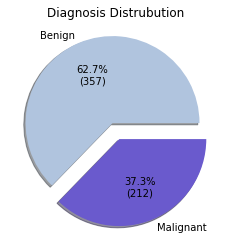

In [19]:
# For displaying both percentages and values
def new_format(values):
    def my_format(percentage):
        total = values.count()
        val = int(round(percentage*total/100.0))
        return '{:.1f}%\n({v:d})'.format(percentage, v=val)
    return my_format

plt.pie(data['diagnosis'].value_counts(), 
        labels=['Benign','Malignant'], 
        colors=['lightsteelblue','slateblue'],
        explode=(0.1, 0.1), 
        shadow=True, 
        autopct=new_format(data['diagnosis']))
plt.title('Diagnosis Distrubution')
plt.show()

To observe all correlation between features, we can take a look at the correlation heatmap.

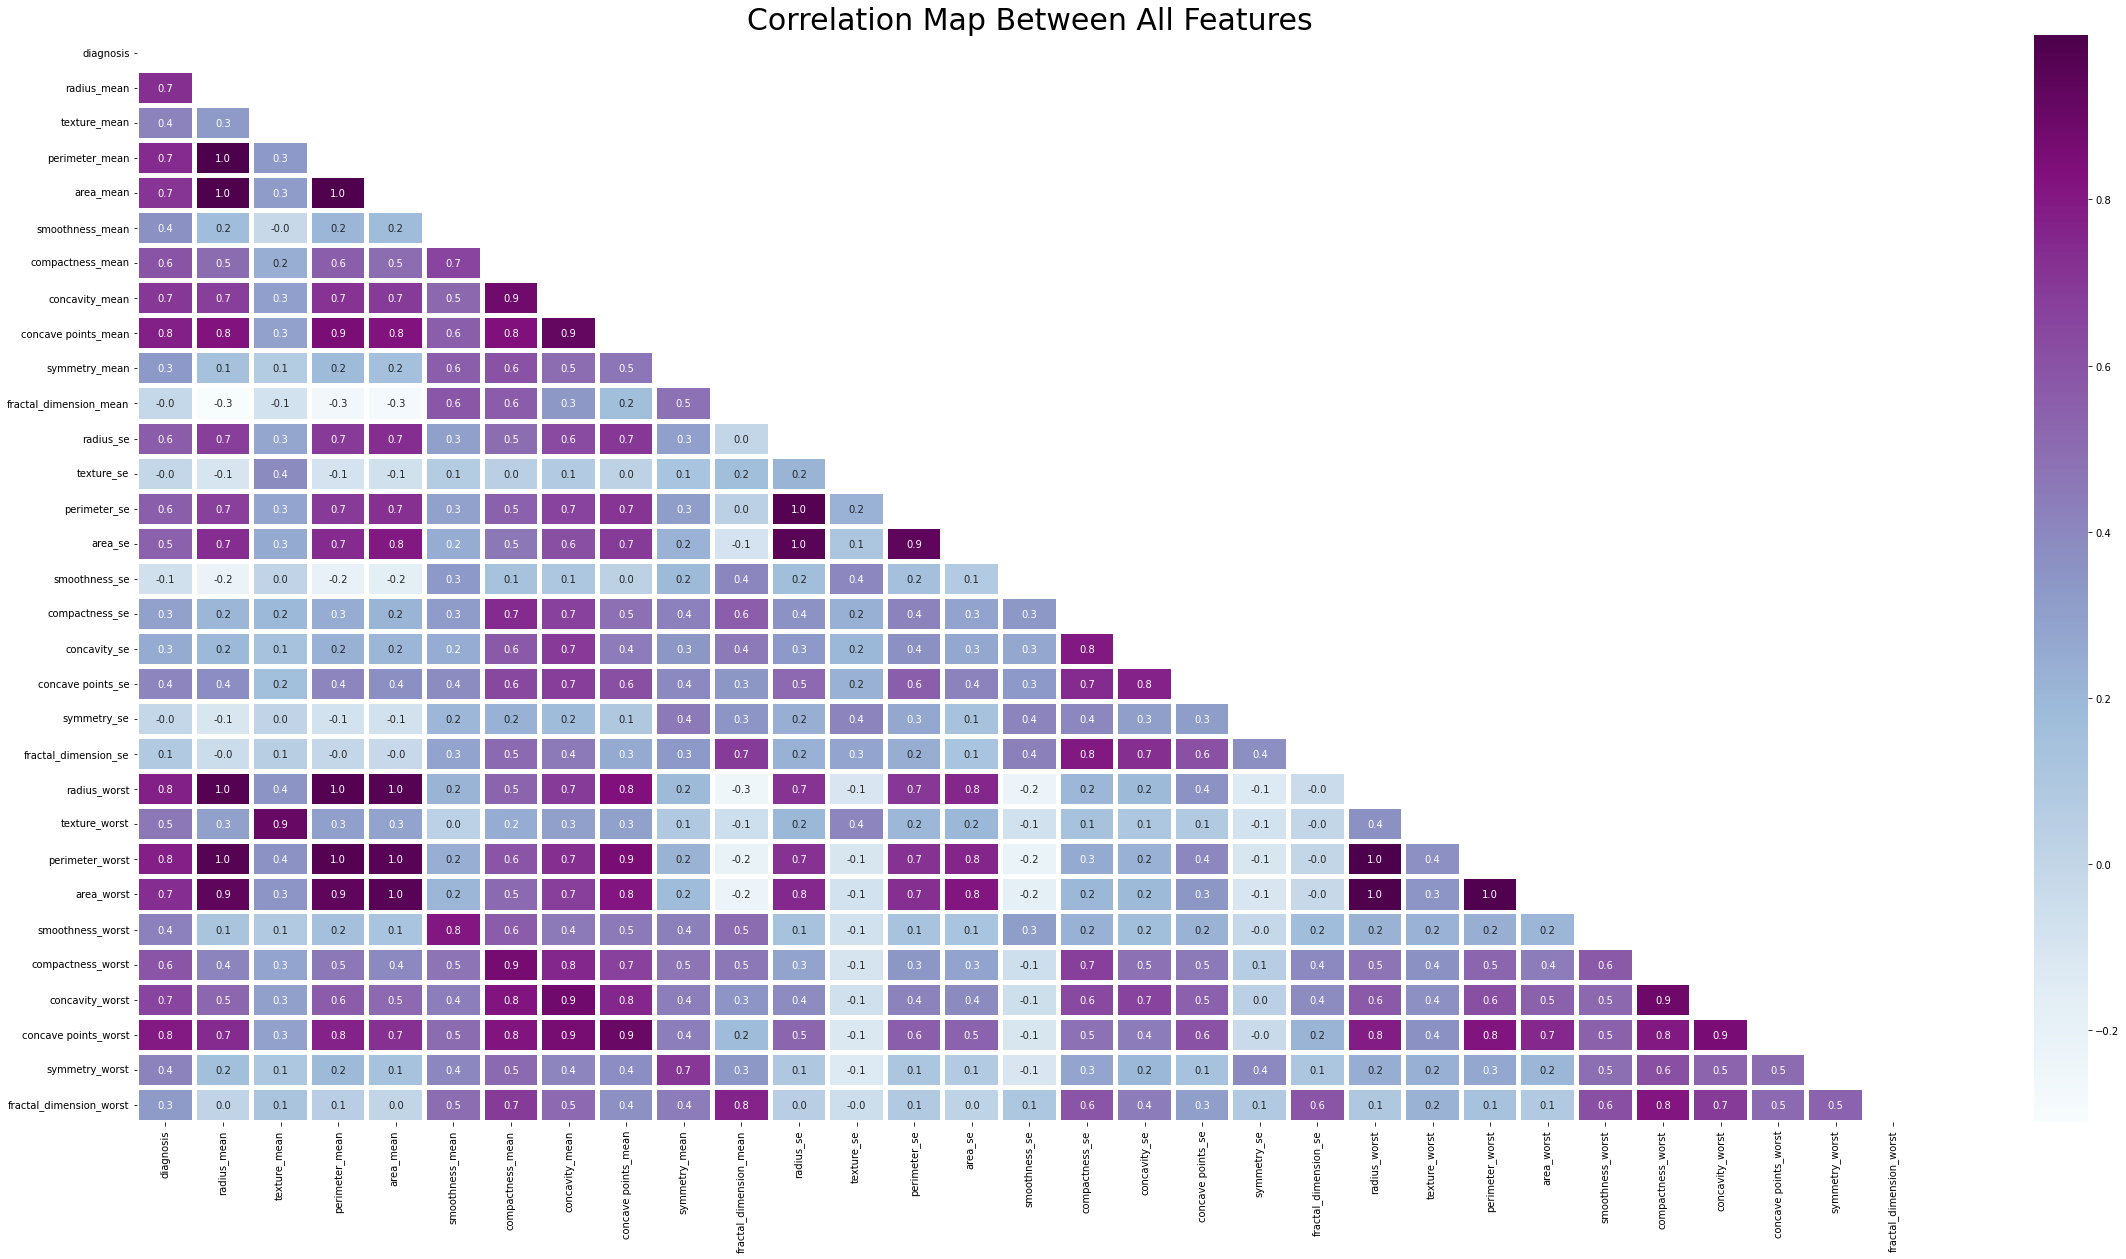

In [20]:
corr = data.corr()
plt.figure(figsize=(40,20))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='BuPu', linewidths=4, fmt= '.1f', annot=True, mask=mask)
plt.title("Correlation Map Between All Features", fontsize = 30)
plt.show()


As it can be seen, there are some high correlated features which would cause multicollinearity. We have to drop some of those high correlated columns.

In [21]:
correlated = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.85)
new_data = correlated.fit_transform(data)

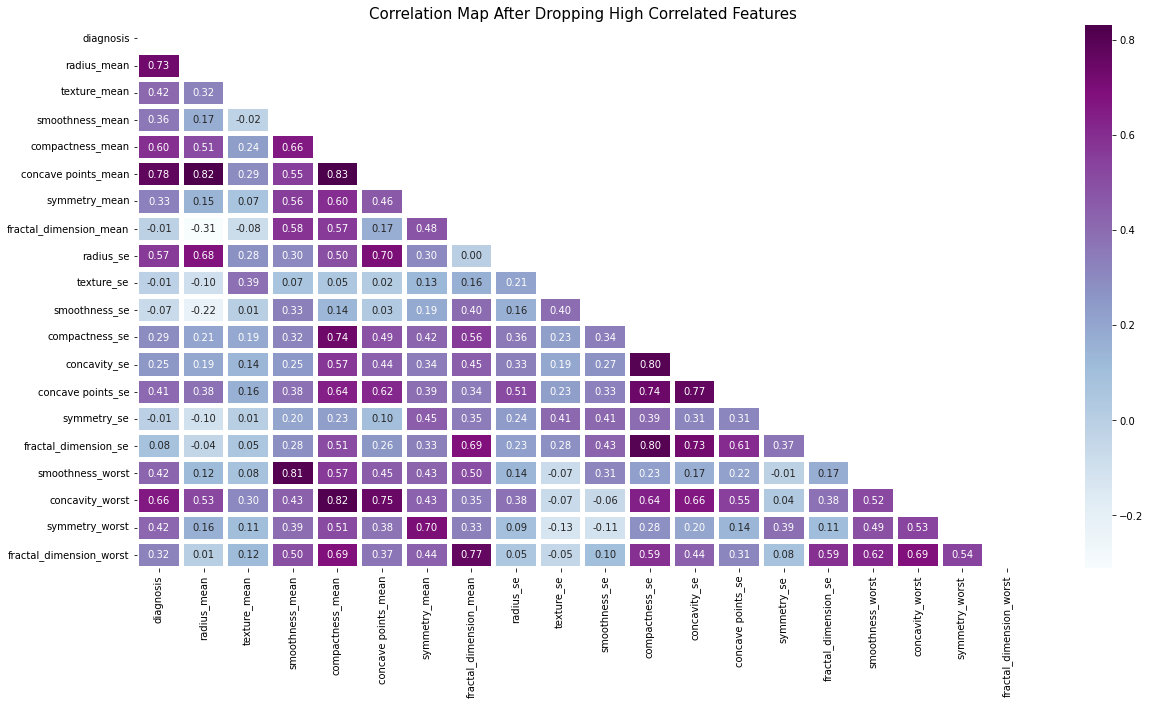

In [22]:
corrmat = new_data.corr(method='pearson')

plt.figure(figsize=(20,10))
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, cmap='BuPu', linewidths=4, fmt= '.2f', annot=True, mask=mask)
plt.title("Correlation Map After Dropping High Correlated Features", fontsize=15)
plt.show()

## 2. Data Preprocessing

### 2.1. Splitting the Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(new_data.drop('diagnosis',axis=1), new_data['diagnosis'], test_size=0.3, random_state=5)
X_train.shape, X_test.shape

((398, 19), (171, 19))

### 2.2. Standardization

In [26]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Classification Models

### 3.0. Used Functions

In [27]:
## To prevent code repetition:

def plot_conf_matrix(model_name, model):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    labels = ['Benign', 'Malignant']
    cmp = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
    fig, ax = plt.subplots(figsize = (5.6,6))
    acc =  calc_accuracy(model)
    plt.title(f'{model_name} (Accuracy:{"{:.2f}".format(acc)})')
    cmp.plot(cmap='BuPu', ax=ax)

def plot_roc(model):
    y_probas = model.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas, cmap='rainbow',figsize=(6,6))

def calc_accuracy(model):
    return accuracy_score(y_test, model.predict(X_test))*100

def calc_f1score(model):
    return f1_score(y_test, model.predict(X_test))*100

def calc_precision(model):
    return precision_score(y_test, model.predict(X_test))*100

def print_scores(model_name, model):
    print("Scores for", model_name)
    print("Accuracy: %", "{:.4f}".format(calc_accuracy(model)))
    print("Precision: %", "{:.4f}".format(calc_precision(model)))
    print("F1 score: %", "{:.4f}".format(calc_f1score(model)))
    plot_conf_matrix(model_name,model)
    plot_roc(model)

### 3.1. Logistic Regression

Scores for Logistic Regression
Accuracy: % 97.6608
Precision: % 98.3051
F1 score: % 96.6667


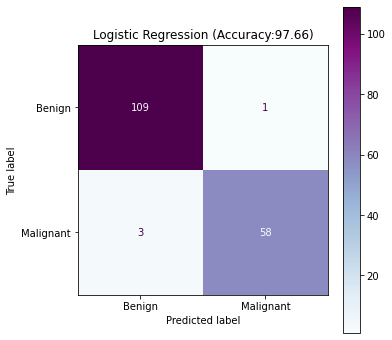

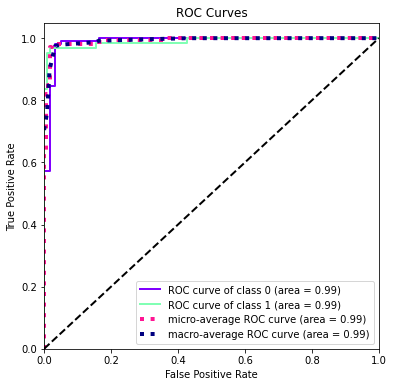

In [28]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
print_scores('Logistic Regression', logistic_regression)

### 3.2. Decision Tree

Scores for Decision Tree
Accuracy: % 94.1520
Precision: % 90.4762
F1 score: % 91.9355


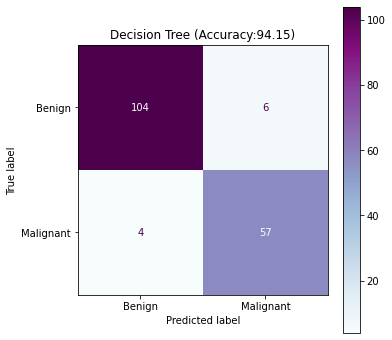

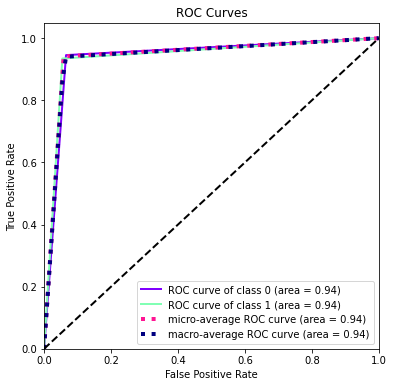

In [29]:
decision_tree = DecisionTreeClassifier(random_state=11)
decision_tree.fit(X_train, y_train)
print_scores('Decision Tree', decision_tree)

### 3.3. K-Nearest Neighbors

Scores for K-Nearest Neighbors
Accuracy: % 94.1520
Precision: % 91.8033
F1 score: % 91.8033


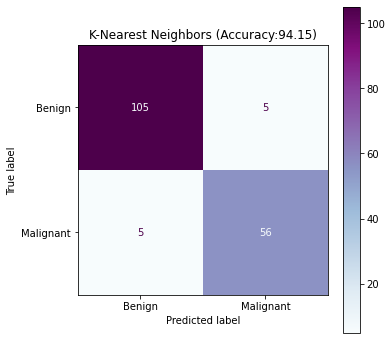

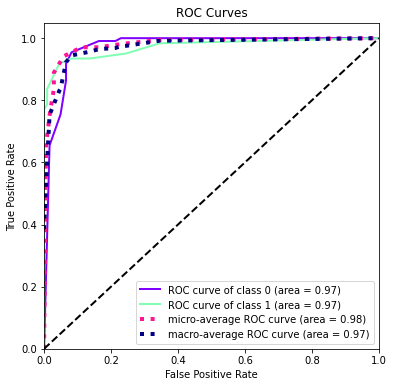

In [30]:
knn = KNeighborsClassifier()
k_range = list(range(1,21))
param_grid = dict(n_neighbors=k_range)
knn_grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', refit=True)
knn_grid.fit(X_train, y_train)
k_nearest_neighbors = knn_grid.best_estimator_
print_scores('K-Nearest Neighbors', k_nearest_neighbors)

### 3.4. Random Forest

Scores for Random Forest
Accuracy: % 96.4912
Precision: % 95.0820
F1 score: % 95.0820


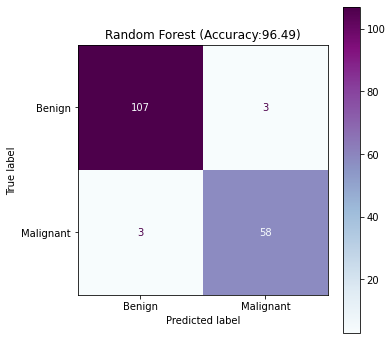

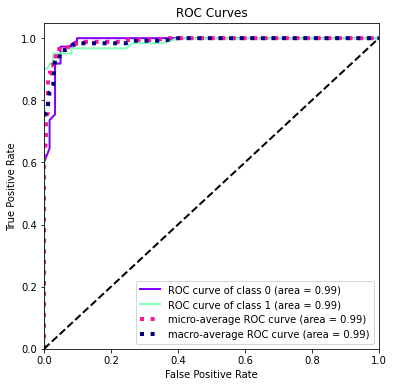

In [31]:
random_forest = RandomForestClassifier(random_state=13)
random_forest.fit(X_train, y_train)
print_scores("Random Forest",random_forest)

## 4. Model Comparison

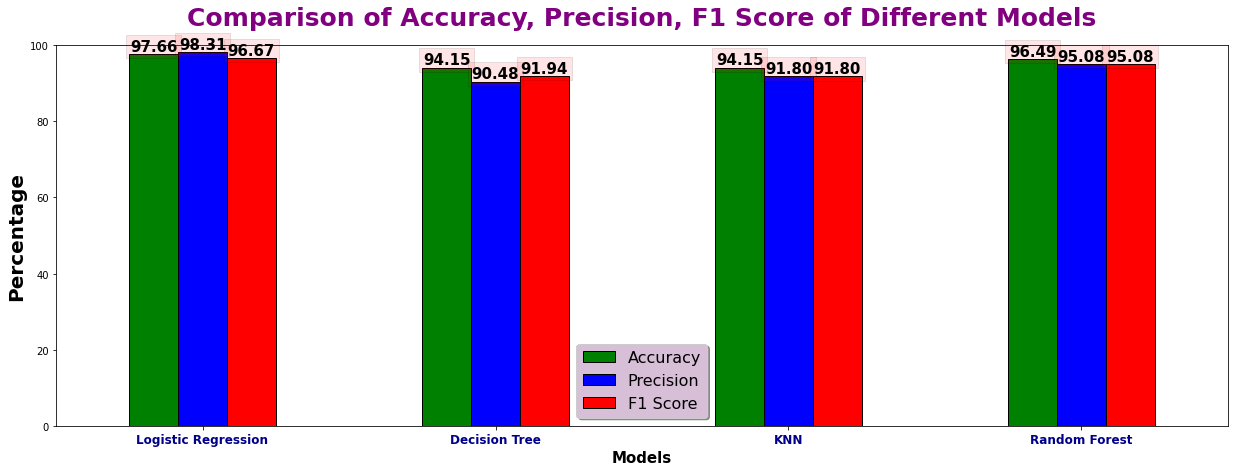

In [41]:
models = {
    "Model": ['Logistic Regression', 'Decision Tree', 'KNN','Random Forest'],
    "Accuracy": [calc_accuracy(logistic_regression), calc_accuracy(decision_tree), calc_accuracy(k_nearest_neighbors), calc_accuracy(random_forest)],
    "Precision": [calc_precision(logistic_regression), calc_precision(decision_tree), calc_precision(k_nearest_neighbors), calc_precision(random_forest)],
    "F1 Score": [calc_f1score(logistic_regression), calc_f1score(decision_tree), calc_f1score(k_nearest_neighbors), calc_f1score(random_forest)]
}
df = pd.DataFrame(models)

#color = ('indigo', 'mediumpurple', 'lightblue')
color = ('green', 'blue', 'red')
ax = df.plot(x="Model",y=["Accuracy","Precision","F1 Score"], kind="bar", color=color, edgecolor="black", figsize=(21,7))
for bar in ax.patches:
  bar_value = bar.get_height()
  text = "{:.2f}".format(bar_value)
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  bar_color = bar.get_facecolor()
  ax.text(text_x, text_y, text, ha='center', va='bottom', color="black",
          size=15, fontweight = 'bold', bbox = dict(facecolor = 'red', alpha =.1))
plt.xticks(color='darkblue', rotation=0, fontsize='12', fontweight='bold')
plt.legend(loc = 'best', fontsize=16, shadow=True, facecolor="thistle")
plt.ylabel("Percentage",fontsize='20', fontweight='bold')
plt.xlabel("Models",fontsize='15', fontweight='bold')
plt.ylim(0, 100)
plt.title("Comparison of Accuracy, Precision, F1 Score of Different Models", fontsize=25, fontweight='bold', color = "purple", pad=20)
plt.show()
  
